In [13]:
# -*- coding: UTF-8 -*-
from urllib import request,error
from urllib import parse
import json

![title](F:/gitproject/python_notes/img/youdao.png)

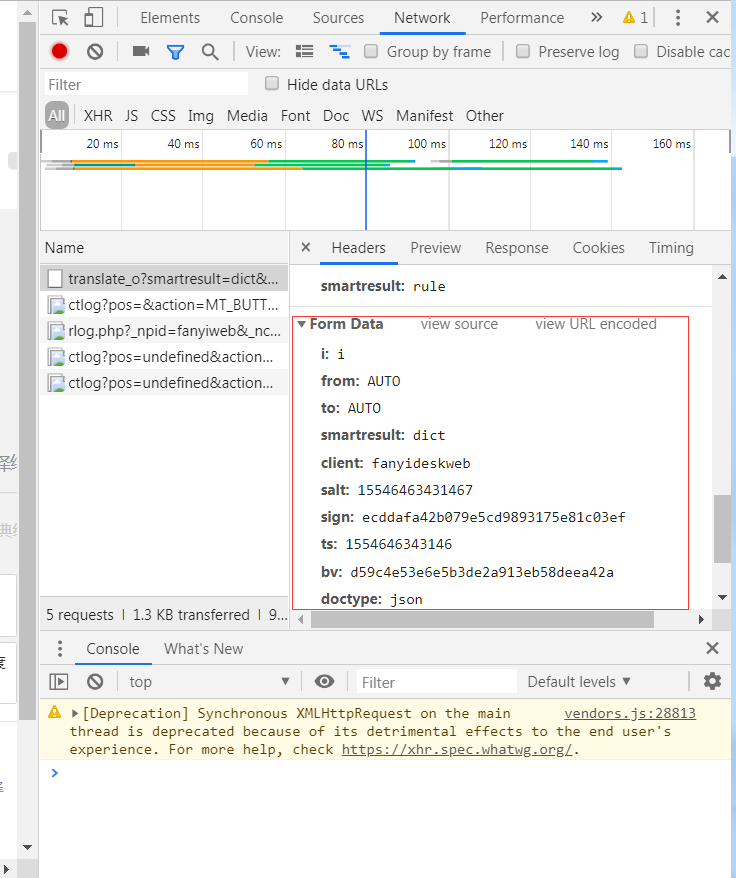

In [14]:
from IPython.display import Image
Image(filename="F:/gitproject/python_notes/img/youdao.png",width=400,height=400)

In [15]:
#对应上图的Request URL
Request_URL = 'http://fanyi.youdao.com/translate'
#创建Form_Data字典，存储上图的Form Data
Form_Date = {}
Form_Date['i'] = '我爱你'
Form_Date['doctype'] = 'json'    

#使用urlencode方法转换标准格式
data = parse.urlencode(Form_Date).encode('utf-8')
#传递Request对象和转换完格式的数据

### 异常处理1
* 使用urllib.error接收urllib.request产生的异常
* urllib.error有两个方法，URLError和HTTPError

In [16]:
# 1.异常处理 https://blog.csdn.net/c406495762/article/details/59488464
try:
    response = request.urlopen(Request_URL,data)
    #读取信息并解码
except error.HTTPError as e:
    print("HTTPError")
    print(e.code)
except error.URLError as e:
    print("URLError")
    print(e.reason)
html = response.read().decode('utf-8')
print(html)
#使用JSON
translate_results = json.loads(html)
#找到翻译结果
translate_results = translate_results['translateResult'][0][0]['tgt']
#打印翻译信息
print("翻译的结果是：%s" % translate_results)

                          {"type":"ZH_CN2EN","errorCode":0,"elapsedTime":2,"translateResult":[[{"src":"我爱你","tgt":"I love you"}]]}

翻译的结果是：I love you


### 异常处理2
使用hasattr函数判断URLError含有的属性
* 如果含有reason属性表明是URLError
* 如果含有code属性表明是HTTPError

In [17]:
try:
    response = request.urlopen(Request_URL,data)
except error.URLError as e:
    if hasattr(e,'code'):
        print("HTTPError")
        print(e.code)
    elif hasattr(e,'reason'):
        print("URLError")
        print(e.reason)
html = response.read().decode('utf-8')
print(html)
#使用JSON
translate_results = json.loads(html)
#找到翻译结果
translate_results = translate_results['translateResult'][0][0]['tgt']
#打印翻译信息
print("翻译的结果是：%s" % translate_results)

                          {"type":"ZH_CN2EN","errorCode":0,"elapsedTime":1,"translateResult":[[{"src":"我爱你","tgt":"I love you"}]]}

翻译的结果是：I love you


## [使用User Agent和代理IP隐藏身份](https://blog.csdn.net/c406495762/article/details/60137956)

### 一、为何要设置User Agent

    有一些网站不喜欢被爬虫程序访问，所以会检测连接对象，如果是爬虫程序，也就是非人点击访问，它就会不让你继续访问，所以为了要让程序可以正常运行，需要隐藏自己的爬虫程序的身份。此时，我们就可以通过设置User Agent的来达到隐藏身份的目的，User Agent的中文名为用户代理，简称UA。

    User Agent存放于Headers中，服务器就是通过查看Headers中的User Agent来判断是谁在访问。在Python中，如果不设置User Agent，程序将使用默认的参数，那么这个User Agent就会有Python的字样，如果服务器检查User Agent，那么没有设置User Agent的Python程序将无法正常访问网站。

    Python允许我们修改这个User Agent来模拟浏览器访问，它的强大毋庸置疑。

### 二、常见的User Agent

1. Android
    + Mozilla/5.0 (Linux; Android 4.1.1; Nexus 7 Build/JRO03D) AppleWebKit/535.19 (KHTML, like Gecko) Chrome/18.0.1025.166 Safari/535.19
    + Mozilla/5.0 (Linux; U; Android 4.0.4; en-gb; GT-I9300 Build/IMM76D) AppleWebKit/534.30 (KHTML, like Gecko) Version/4.0 Mobile Safari/534.30
    + Mozilla/5.0 (Linux; U; Android 2.2; en-gb; GT-P1000 Build/FROYO) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1

2. Firefox
    + Mozilla/5.0 (Windows NT 6.2; WOW64; rv:21.0) Gecko/20100101 Firefox/21.0
    + Mozilla/5.0 (Android; Mobile; rv:14.0) Gecko/14.0 Firefox/14.0

3. Google Chrome
    + Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.94 Safari/537.36
    + Mozilla/5.0 (Linux; Android 4.0.4; Galaxy Nexus Build/IMM76B) AppleWebKit/535.19 (KHTML, like Gecko) Chrome/18.0.1025.133 Mobile Safari/535.19

4. iOS
    + Mozilla/5.0 (iPad; CPU OS 5_0 like Mac OS X) AppleWebKit/534.46 (KHTML, like Gecko) Version/5.1 Mobile/9A334 Safari/7534.48.3
    + Mozilla/5.0 (iPod; U; CPU like Mac OS X; en) AppleWebKit/420.1 (KHTML, like Gecko) Version/3.0 Mobile/3A101a Safari/419.3

上面列举了Andriod、Firefox、Google Chrome、iOS的一些User Agent，直接copy就能用。

### 三、设置User Agent的方法
在创建Request对象的时候，可以传入headers参数。 
因此，想要设置User Agent，有两种方法：

1. 在创建Request对象的时候，填入headers参数(包含User Agent信息)，这个Headers参数要求为字典；

2. 在创建Request对象的时候不添加headers参数，在创建完成之后，使用add_header()的方法，添加headers。

#### 方法一：

创建文件urllib_test09.py，使用上面提到的Android的第一个User Agent，在创建Request对象的时候传入headers参数，编写代码如下：


In [18]:
# -*- coding: UTF-8 -*-
from urllib import request

if __name__ == "__main__":
    #以CSDN为例，CSDN不更改User Agent是无法访问的
    url = 'http://www.csdn.net/'
    head = {}
    #写入User Agent信息
    head['User-Agent'] = 'Mozilla/5.0 (Linux; Android 4.1.1; Nexus 7 Build/JRO03D) AppleWebKit/535.19 (KHTML, like Gecko) Chrome/18.0.1025.166  Safari/535.19'
     #创建Request对象
    req = request.Request(url, headers=head)
    #传入创建好的Request对象
    response = request.urlopen(req)
    #读取响应信息并解码
    html = response.read().decode('utf-8')
    #打印信息
    print(html)


<!DOCTYPE html>
<html>
<head>
    <meta charset="utf-8">
    <meta http-equiv="content-type" content="text/html; charset=utf-8">
    <meta http-equiv="X-UA-Compatible" content="IE=Edge">
    <meta name="viewport" content="width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no">
    <meta name="apple-mobile-web-app-status-bar-style" content="black">
    <meta name="referrer"content="always">
    <meta name="msvalidate.01" content="3189512127C34C46BC74BED5852D45E4" /></meta>
    <title>CSDN-专业IT技术社区</title>
    <script src='/js/tingyun-rum-feed-wap.js?v=20180509' type='text/javascript'></script>
    <link ref="canonical"  href="http://www.csdn.net/">
    <link href="//csdnimg.cn/public/favicon.ico" rel="SHORTCUT ICON">
    <link rel="stylesheet" href="//csdnimg.cn/public/common/toolbar/content_toolbar_css/m_toolbar-1.1.1.css">
    <script>
        //h5定义rem
        initpage();
        window.onresize = initpage;
        function initpage(){
        

#### 方法二：
使用上面提到的Android的第一个User Agent，在创建Request对象时不传入headers参数，创建之后使用add_header()方法，添加headers，编写代码如下：

In [ ]:
# -*- coding: UTF-8 -*-
from urllib import request

if __name__ == "__main__":
    #以CSDN为例，CSDN不更改User Agent是无法访问的
    url = 'http://www.csdn.net/'
    #创建Request对象
    req = request.Request(url)
    #传入headers
    req.add_header('User-Agent', 'Mozilla/5.0 (Linux; Android 4.1.1; Nexus 7 Build/JRO03D) AppleWebKit/535.19 (KHTML, like Gecko) Chrome/18.0.1025.166  Safari/535.19')
    #传入创建好的Request对象
    response = request.urlopen(req)
    #读取响应信息并解码
    html = response.read().decode('utf-8')
    #打印信息
    print(html)

### 四、IP代理的使用

1. 为何使用IP代理

    User Agent已经设置好了，但是还应该考虑一个问题，程序的运行速度是很快的，如果我们利用一个爬虫程序在网站爬取东西，一个固定IP的访问频率就会很高，这不符合人为操作的标准，因为人操作不可能在几ms内，进行如此频繁的访问。所以一些网站会设置一个IP访问频率的阈值，如果一个IP访问频率超过这个阈值，说明这个不是人在访问，而是一个爬虫程序。

2. 一般步骤说明

    一个很简单的解决办法就是设置延时，但是这显然不符合爬虫快速爬取信息的目的，所以另一种更好的方法就是使用IP代理。使用代理的步骤：
**(1)** 调用urlib.request.ProxyHandler()，proxies参数为一个字典。

**(2)** 创建Opener(类似于urlopen，这个代开方式是我们自己定制的)

**(3)** 安装Opener

使用install_opener方法之后，会将程序默认的urlopen方法替换掉。也就是说，如果使用install_opener之后，在该文件中，再次调用urlopen会使用自己创建好的opener。如果不想替换掉，只是想临时使用一下，可以使用opener.open(url)，这样就不会对程序默认的urlopen有影响。

3. 代理IP选取

    在写代码之前，先在代理IP网站选好一个IP地址，推荐西刺代理IP。

    URL：http://www.xicidaili.com/

    注意：当然也可以写个正则表达式从网站直接爬取IP，但是要记住不要太频繁爬取，加个延时什么的，太频繁给服务器带来压力了，服务器会直接把你block，不让你访问的，我就被封了两天。

    从西刺网站选出信号好的IP，我的选择如下：(110.52.235.204)


In [2]:
# 编写代码访问http://www.whatismyip.com.tw/，该网站是测试自己IP为多少的网址，服务器会返回访问者的IP。
# -*- coding: UTF-8 -*-
from urllib import request

if __name__ == "__main__":
    #访问网址
    url = 'https://www.whatismyip.com'
    #这是代理IP
    proxy = {'http':'110.52.235.204:9999'}
    #创建ProxyHandler
    proxy_support = request.ProxyHandler(proxy)
    #创建Opener
    opener = request.build_opener(proxy_support)
    #添加User Angent
    opener.addheaders = [('User-Agent','Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/56.0.2924.87 Safari/537.36')]
    #安装OPener
    request.install_opener(opener)
    #使用自己安装好的Opener
    response = request.urlopen(url)
    #读取相应信息并解码
    html = response.read().decode("utf-8")
    #打印信息
    print(html)


<!DOCTYPE html>
<html lang="en-US" prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb#">
<head>
<meta charset="UTF-8">
<meta http-equiv="X-UA-Compatible" content="IE=edge">
<meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no">
<meta name="mobile-web-app-capable" content="yes">
<meta name="apple-mobile-web-app-capable" content="yes">
<meta name="apple-mobile-web-app-title" content="WhatIsMyIP.com® - ">
<link rel="profile" href="http://gmpg.org/xfn/11">
<link rel="pingback" href="https://www.whatismyip.com/xmlrpc.php">
<link rel="alternate" href="https://www.whatismyip.com" hreflang="en" />
<link rel="alternate" href="https://www.whatismyip.com" hreflang="en-us" />
<link rel="alternate" href="https://www.whatismyip.com/fr/" hreflang="fr" />
<link rel="alternate" href="https://www.whatismyip.com/fr/" hreflang="fr-fr" />
<link rel="alternate" href="https://www.whatismyip.com/es/" hreflang="es" />
<link rel="alternate" href="https://www.whatismyip.com/es/